In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [29]:
# points = {
#     "blue": [[2, 4], [1, 5], [2, 3], [3, 2], [2, 1]],
#     "red": [[5, 6], [4, 5], [4, 6], [6, 6], [5, 4]],
# }

# new_point = [3,3]

points = {
    "blue": [[2, 4,3], [1, 5,4], [2, 3,7], [3, 2,3], [2, 1,4]],
    "red": [[5, 6,9], [4, 5,3], [4, 6,1], [6, 6,2], [5, 4,4]],
}

new_point = [5,5,3]

In [3]:
def euclidean_distance(p,q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

In [4]:
euclidean_distance([3,4],[4,5])

1.4142135623730951

In [6]:
class KNearestNeightbors:
    
    def __init__(self, k=3):
        self.k = k
        self.point = None
        
    def fit(self, points):
        self.points = points
    
    def predict(self, new_point):
        distances = []
        
        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append([distance, category])
                
        categories = [category[1]  for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [31]:
clf = KNearestNeightbors()
clf.fit(points)

print(clf.predict(new_point))

red


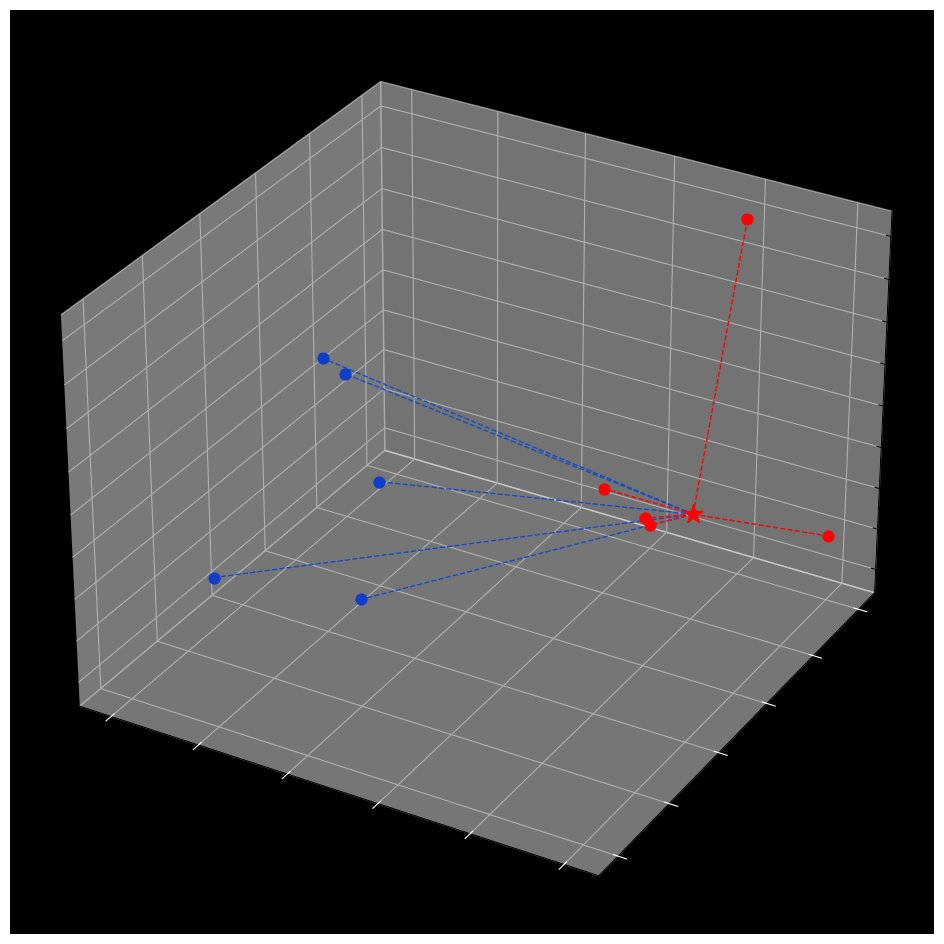

In [30]:
# ax = plt.subplot()

fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(projection="3d")
ax.grid(True, color="#323232")
ax.set_facecolor("black")
ax.tick_params(axis="x", color="white")
ax.tick_params(axis="y", color="white")

for point in points["blue"]:
    # ax.scatter(point[0], point[1], color="#103DCA",s = 60)
    ax.scatter(point[0], point[1],point[2], color="#103DCA",s = 60)
    
for point in points["red"]:
    # ax.scatter(point[0], point[1], color="#FF0000",  s = 60)
    ax.scatter(point[0], point[1], point[2], color="#FF0000",  s = 60)
    
new_class = clf.predict(new_point)

color = "#FF0000" if new_class == "red" else "#104DCA"
ax.scatter(new_point[0], new_point[1],new_point[2] ,color=color, marker="*", s=200 , zorder=100)

for point in points["blue"]:
    # ax.plot([new_point[0], point[0]],[new_point[1], point[1]], color="#104DCA", linestyle="--", linewidth="1")
    ax.plot([new_point[0], point[0]],[new_point[1], point[1]], [new_point[2], point[2]],color="#104DCA", linestyle="--", linewidth="1")

for point in points["red"]:
    # ax.plot([new_point[0], point[0]],[new_point[1], point[1]], color="#FF0000", linestyle="--", linewidth="1")
    ax.plot([new_point[0], point[0]],[new_point[1], point[1]], [new_point[2], point[2]] ,color="#FF0000", linestyle="--", linewidth="1")
    


